In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
os.getcwd()

In [2]:
spots = pd.read_csv('Data/spatialLIBD/spatialLIBD_spot_counts.csv', header = 0, index_col = 0, sep =',')
st = pd.read_csv('Data/spatialLIBD/spatialLIBD_spot_st.csv')
gene_meta = pd.read_csv('Data/spatialLIBD/gene_meta.csv')
cell_type = pd.read_csv('Data/spatialLIBD/RowDataTable1.csv')
csr = pd.read_csv('Data/spatialLIBD/spatialLIBD_csr_counts.csv', index_col=0)


In [3]:
spots

,sample_id,Cluster,sum_umi,sum_gene,subject,position,replicate,subject_position,discard,key,...,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial,spatialLIBD,ManualAnnotation,in_tissue,array_row,array_col
AAACAACGAATAGTTC-1,151507,6,948,727,Br5292,0,1,Br5292_pos0,False,151507_AAACAACGAATAGTTC-1,...,1,1,1,1,1,L1,NaN,True,0,16
AAACAAGTATCTCCCA-1,151507,3,4261,2170,Br5292,0,1,Br5292_pos0,False,151507_AAACAAGTATCTCCCA-1,...,2,2,1,2,1,L3,NaN,True,50,102
AAACAATCTACTAGCA-1,151507,2,1969,1093,Br5292,0,1,Br5292_pos0,False,151507_AAACAATCTACTAGCA-1,...,2,1,4,1,6,L1,NaN,True,3,43
AAACACCAATAACTGC-1,151507,5,3368,1896,Br5292,0,1,Br5292_pos0,False,151507_AAACACCAATAACTGC-1,...,7,8,7,8,1,WM,NaN,True,59,19
AAACAGCTTTCAGAAG-1,151507,1,2981,1620,Br5292,0,1,Br5292_pos0,False,151507_AAACAGCTTTCAGAAG-1,...,8,2,8,1,1,L6,NaN,True,43,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,5,2880,1638,Br8100,300,2,Br8100_pos300,False,151676_TTGTTGTGTGTCAAGA-1,...,6,1,4,1,1,L6,NaN,True,31,77
TTGTTTCACATCCAGG-1.11,151676,2,2640,1526,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCACATCCAGG-1,...,5,5,5,8,1,WM,NaN,True,58,42
TTGTTTCATTAGTCTA-1.11,151676,2,2063,1279,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCATTAGTCTA-1,...,5,5,8,1,1,WM,NaN,True,60,30
TTGTTTCCATACAACT-1.11,151676,7,1031,748,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCCATACAACT-1,...,2,3,2,4,7,L6,NaN,True,45,27


In [4]:
spots.shape

(47681, 69)

In [5]:
# 12 samples in dataset
len(np.unique(spots.loc(axis=1)['sample_id'].values))

12

In [6]:
# taken from 3 patients
np.unique(spots.loc(axis=1)['subject'].values)

array(['Br5292', 'Br5595', 'Br8100'], dtype=object)

In [7]:
# rename st column names
st.columns = ["spot", "X", "Y"]
st.head()

,spot,X,Y
0,AAACAACGAATAGTTC-1,3276,2514
1,AAACAAGTATCTCCCA-1,9178,8520
2,AAACAATCTACTAGCA-1,5133,2878
3,AAACACCAATAACTGC-1,3462,9581
4,AAACAGCTTTCAGAAG-1,2779,7663


In [8]:
print(len(st[['spot']].values), len(np.unique(st[['spot']].values)))

47681 4941


In [11]:
print(len(st), len(spots))

47681 47681


In [12]:
# select specific cols only
spot = spots[['sample_id', 'subject', 'replicate', 'Cluster', 'sum_umi', 'sum_gene', 'key', 'in_tissue','spatialLIBD', 'array_col', 'array_row']]
spot

,sample_id,subject,replicate,Cluster,sum_umi,sum_gene,key,in_tissue,spatialLIBD,array_col,array_row
AAACAACGAATAGTTC-1,151507,Br5292,1,6,948,727,151507_AAACAACGAATAGTTC-1,True,L1,16,0
AAACAAGTATCTCCCA-1,151507,Br5292,1,3,4261,2170,151507_AAACAAGTATCTCCCA-1,True,L3,102,50
AAACAATCTACTAGCA-1,151507,Br5292,1,2,1969,1093,151507_AAACAATCTACTAGCA-1,True,L1,43,3
AAACACCAATAACTGC-1,151507,Br5292,1,5,3368,1896,151507_AAACACCAATAACTGC-1,True,WM,19,59
AAACAGCTTTCAGAAG-1,151507,Br5292,1,1,2981,1620,151507_AAACAGCTTTCAGAAG-1,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,Br8100,2,5,2880,1638,151676_TTGTTGTGTGTCAAGA-1,True,L6,77,31
TTGTTTCACATCCAGG-1.11,151676,Br8100,2,2,2640,1526,151676_TTGTTTCACATCCAGG-1,True,WM,42,58
TTGTTTCATTAGTCTA-1.11,151676,Br8100,2,2,2063,1279,151676_TTGTTTCATTAGTCTA-1,True,WM,30,60
TTGTTTCCATACAACT-1.11,151676,Br8100,2,7,1031,748,151676_TTGTTTCCATACAACT-1,True,L6,27,45


In [13]:
# merge spot and st info -- merging based on index... no other specifying info in st:S, seems okay?
spot_meta = st.join(spot.reset_index())
spot_meta

,spot,X,Y,index,sample_id,subject,replicate,Cluster,sum_umi,sum_gene,key,in_tissue,spatialLIBD,array_col,array_row
0,AAACAACGAATAGTTC-1,3276,2514,AAACAACGAATAGTTC-1,151507,Br5292,1,6,948,727,151507_AAACAACGAATAGTTC-1,True,L1,16,0
1,AAACAAGTATCTCCCA-1,9178,8520,AAACAAGTATCTCCCA-1,151507,Br5292,1,3,4261,2170,151507_AAACAAGTATCTCCCA-1,True,L3,102,50
2,AAACAATCTACTAGCA-1,5133,2878,AAACAATCTACTAGCA-1,151507,Br5292,1,2,1969,1093,151507_AAACAATCTACTAGCA-1,True,L1,43,3
3,AAACACCAATAACTGC-1,3462,9581,AAACACCAATAACTGC-1,151507,Br5292,1,5,3368,1896,151507_AAACACCAATAACTGC-1,True,WM,19,59
4,AAACAGCTTTCAGAAG-1,2779,7663,AAACAGCTTTCAGAAG-1,151507,Br5292,1,1,2981,1620,151507_AAACAGCTTTCAGAAG-1,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47676,TTGTTGTGTGTCAAGA-1,7946,6378,TTGTTGTGTGTCAAGA-1.11,151676,Br8100,2,5,2880,1638,151676_TTGTTGTGTGTCAAGA-1,True,L6,77,31
47677,TTGTTTCACATCCAGG-1,5512,9594,TTGTTTCACATCCAGG-1.11,151676,Br8100,2,2,2640,1526,151676_TTGTTTCACATCCAGG-1,True,WM,42,58
47678,TTGTTTCATTAGTCTA-1,4684,9827,TTGTTTCATTAGTCTA-1.11,151676,Br8100,2,2,2063,1279,151676_TTGTTTCATTAGTCTA-1,True,WM,30,60
47679,TTGTTTCCATACAACT-1,4491,8029,TTGTTTCCATACAACT-1.11,151676,Br8100,2,7,1031,748,151676_TTGTTTCCATACAACT-1,True,L6,27,45


In [20]:
def plot_cell_layers(df):
    
    layer_idx = df["spatialLIBD"].unique()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 12, figsize = (50,12))
    samples = df["sample_id"].unique()
    
    for idx, sample in enumerate(samples):
        cells_of_samples = df[df["sample_id"] == sample]
        for index in layer_idx:
            cells_of_layer = cells_of_samples[cells_of_samples["spatialLIBD"] == index]
            ax[idx].scatter(cells_of_layer["X"], cells_of_layer["Y"], label = index)
    plt.legend()
    plt.show()

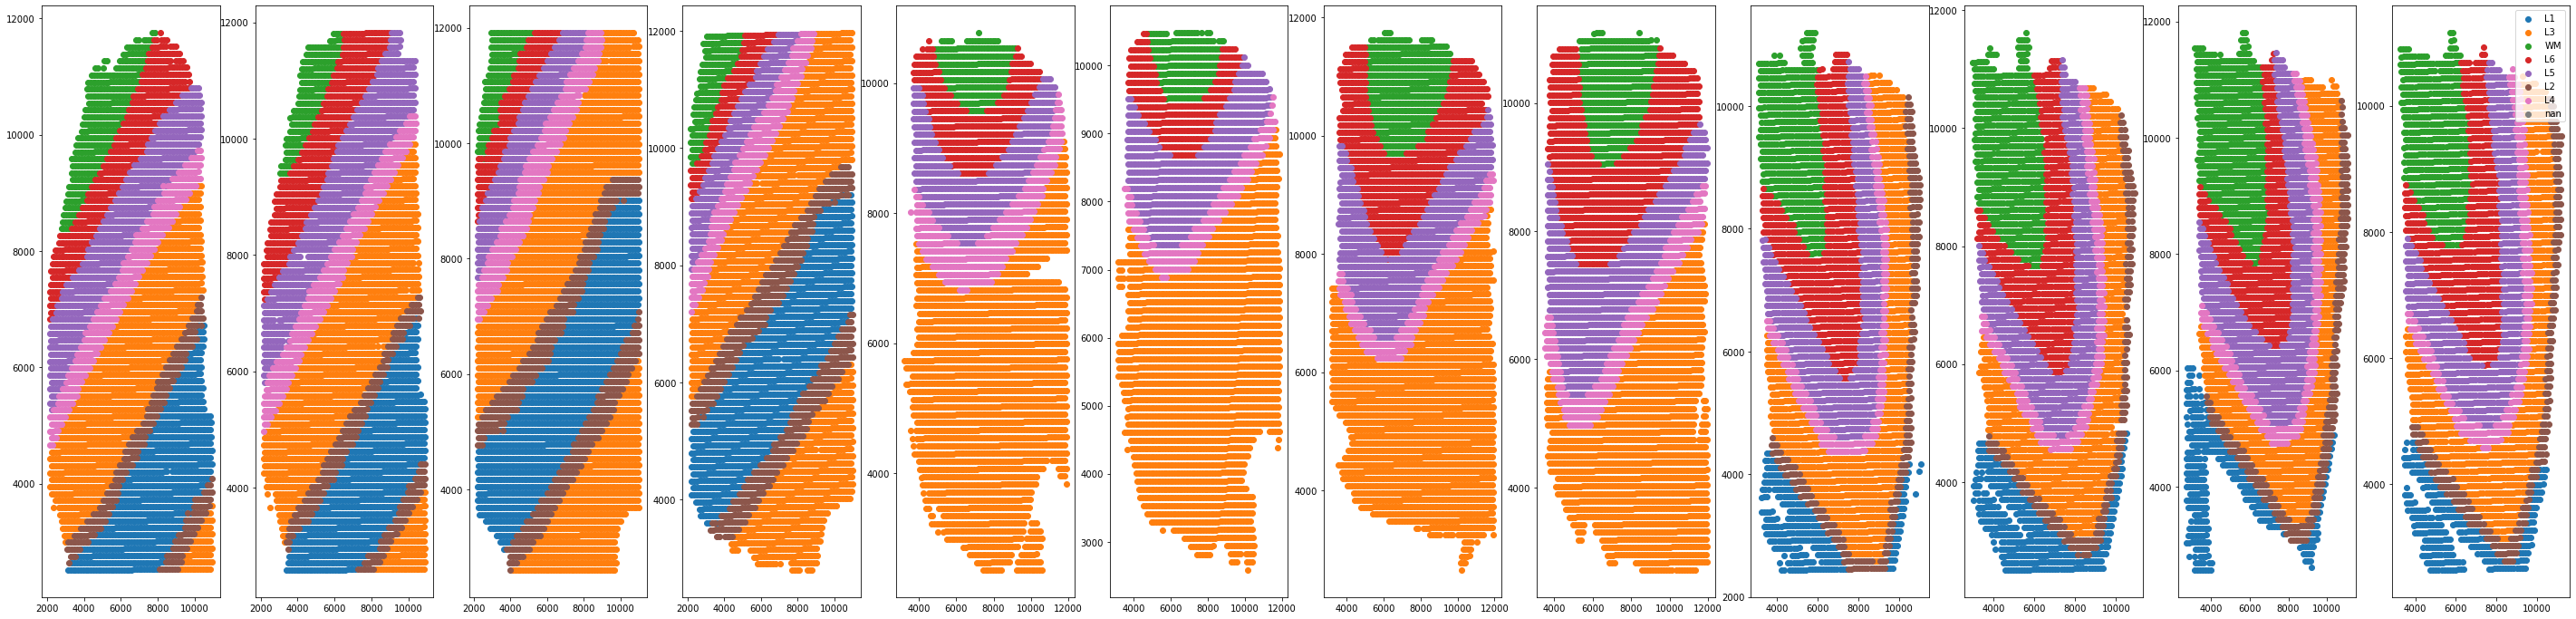

In [21]:
plot_cell_layers(spot_meta) # why does it look weird?

In [ ]:
gene_meta.head()

In [ ]:
cell_type.head()

In [ ]:
cell_type = cell_type.drop(['Unnamed: 0', 'gene_biotype', "Symbol"], axis=1)

In [ ]:
csr

In [ ]:
wide = csr.pivot_table(index = "gene", columns = "spot", values = "count")
wide = wide.fillna(0)
counts_df = wide.reset_index()
counts_df.head()